In [99]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix

# umap
# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

In [3]:
customer_data = pd.read_csv( 'C:/Users/aprataso/Downloads/final_data/treated/customer_info_EDA.csv')
customer_data.head(2)

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,...,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity
0,0,35-49K,Homeowner,2 Adults No Kids,2,0,1,married,senior,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Bakery': 49, 'COUP/STR & MFG': 0, 'Groceries..."
1,0,50-74K,Homeowner,2 Adults No Kids,2,0,7,married,middle-aged,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"{'Bakery': 9, 'COUP/STR & MFG': 0, 'Groceries'..."


In [76]:
#customer_data = customer_data.drop(['MISC SALES TRAN_spend', 'KIOSK-GAS_spend'], axis = 1)

In [77]:
# creating a new variable with only numeric data
info_numeric = customer_data.loc[:, ~customer_data.columns.isin(
    ['income_desc', 'homeowner_desc', 'hh_comp_desc', 'marital_status', 'age_group', 'quantity', 'sales_value_eu', 'department', 'dep_quantity'])]

In [78]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## K-Means

In [89]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

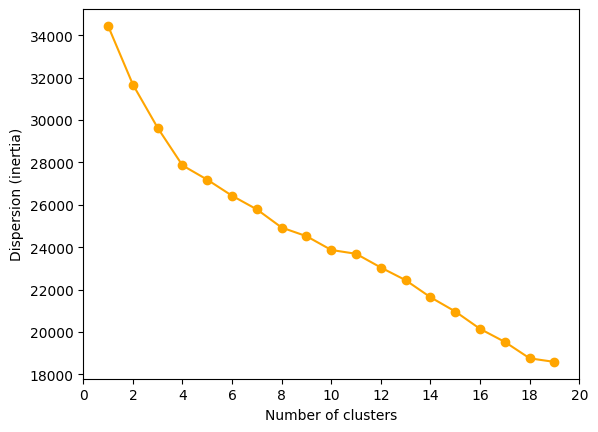

In [90]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [91]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_info)

info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_19492\353943095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)


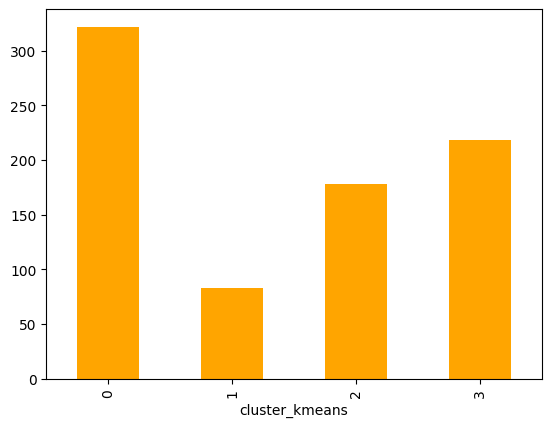

In [92]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [93]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).describe().T


cluster_kmeans                  0      1       2       3
marital_status_code count 322.000 83.000 178.000 218.000
                    mean    1.441  0.687   0.534   0.867
                    std     0.768  0.896   0.851   0.929
                    min     0.000  0.000   0.000   0.000
                    25%     1.000  0.000   0.000   0.000
...                           ...    ...     ...     ...
cluster_kmeans3     min     0.000  0.000   0.000   1.000
                    25%     0.000  1.000   1.000   1.000
                    50%     0.000  1.000   1.000   1.000
                    75%     0.000  1.000   1.000   1.000
                    max     0.000  2.000   1.000   1.000

[336 rows x 4 columns]

In [94]:
info_numeric.groupby(['cluster_kmeans']).mean().T

cluster_kmeans,0,1,2,3
marital_status_code,1.441,0.687,0.534,0.867
household_size_desc,1.311,2.494,3.893,2.009
kid_category_desc,0.140,0.675,1.899,0.009
household_key,1224.699,1394.783,1193.596,1223.835
adult_category_size,1.016,1.771,1.933,2.000
has_kids,0.000,0.277,0.921,0.000
avg_age,44.581,44.217,40.424,46.179
avg_income,52262.422,100018.072,70452.247,65332.569
male,0.295,0.819,0.949,0.991
female,0.497,0.904,0.961,0.991


In [95]:
def visualize_dimensionality_reduction(transformation, targets):
    """
       Visualizes the dimensionality reduction results using a scatter plot.
  
       Args:
           transformation (np.ndarray): The transformed data points.
           targets (List[Any]): The target labels or categories for each data point.
  
       Returns:
           None
       """
    # create a scatter plot of the UMap output
    plt.scatter(transformation[:, 0], transformation[:, 1], 
              color=plt.cm.tab10(np.array(targets).astype(int)))

    labels = np.unique(targets)

    # create a legend with the class labels and colors
    handles = [plt.scatter([],[], color=plt.cm.tab10(i), label=label) for i, label in enumerate(labels)]
    plt.legend(handles=handles, title='Clusters')

    plt.show()

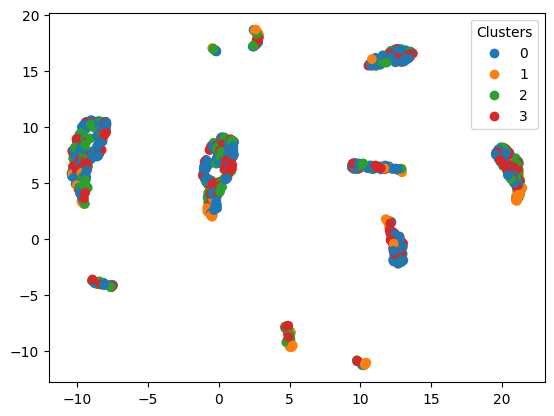

In [104]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_kmeans'].sort_index())

## Hierarchical

In [106]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

In [107]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

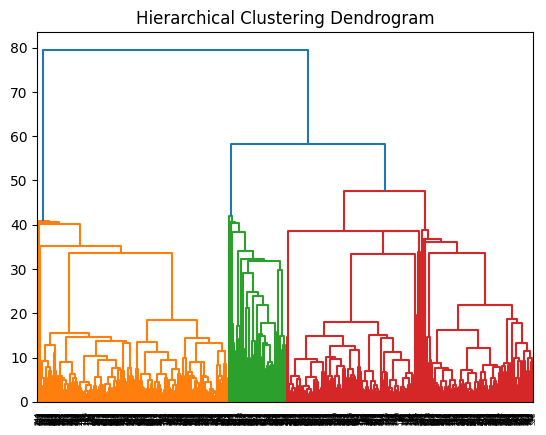

In [108]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

In [109]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=3
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_19492\4284508271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


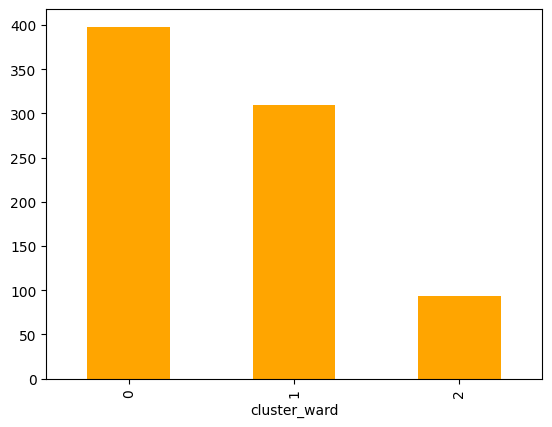

In [110]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [111]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2
marital_status_code,0.721,1.447,0.755
household_size_desc,2.849,1.314,2.340
kid_category_desc,0.864,0.142,0.564
household_key,1188.837,1219.958,1481.404
adult_category_size,1.957,1.010,1.734
has_kids,0.412,0.000,0.245
avg_age,43.603,44.371,44.926
avg_income,68227.387,53108.414,88808.511
male,0.955,0.301,0.798
female,0.967,0.492,0.904


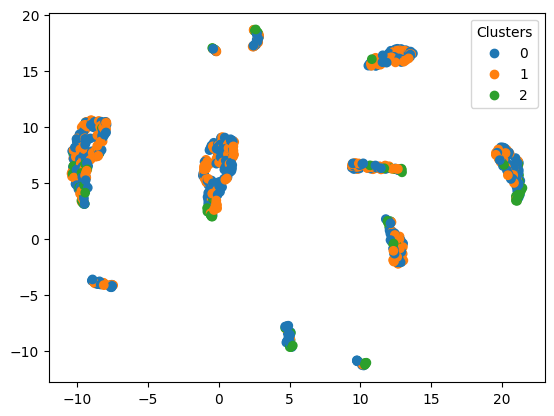

In [112]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_ward'].sort_index())

## DB Scan

In [114]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 10).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_19492\3915876066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 10).fit_predict(scaled_info)


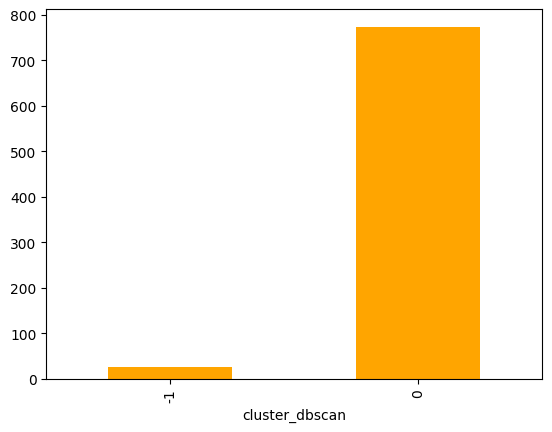

In [115]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [116]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
marital_status_code,1.037,1.004
household_size_desc,2.037,2.203
kid_category_desc,0.407,0.556
household_key,1426.407,1228.505
adult_category_size,1.630,1.563
has_kids,0.296,0.231
avg_age,41.037,44.160
avg_income,65203.704,64796.512
male,0.778,0.681
female,0.815,0.775


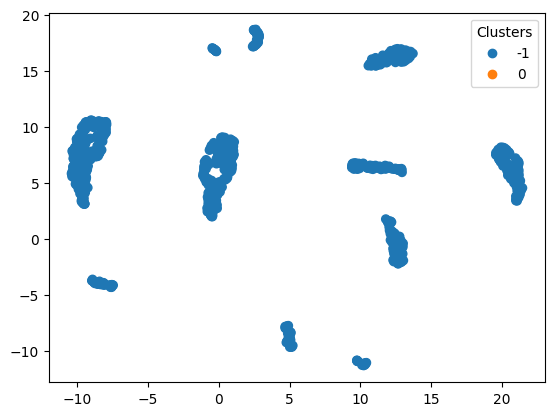

In [117]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_dbscan'].sort_index())

## UMAP

In [101]:
umap_object = umap.UMAP(n_neighbors=15, min_dist=0.3, random_state=42)

In [102]:
X_sample = info_numeric.sort_index()

In [103]:
umap_embedding = umap_object.fit_transform(X_sample)

C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## UMAP to DB SCAN

In [118]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X_sample)


C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


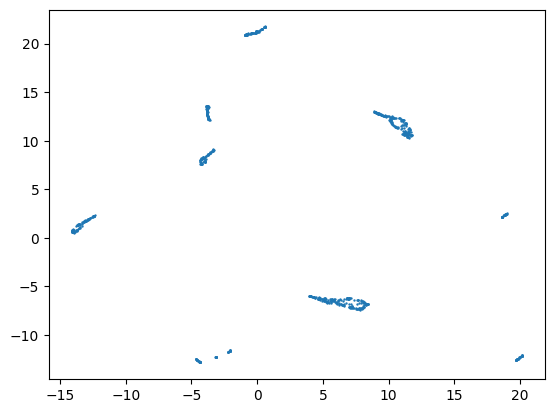

In [119]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [120]:
labels = DBSCAN(eps=1, min_samples=20).fit_predict(clusterable_embedding)

In [122]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_19492\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


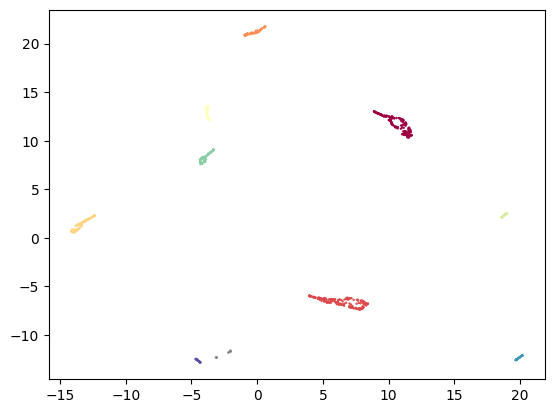

In [123]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

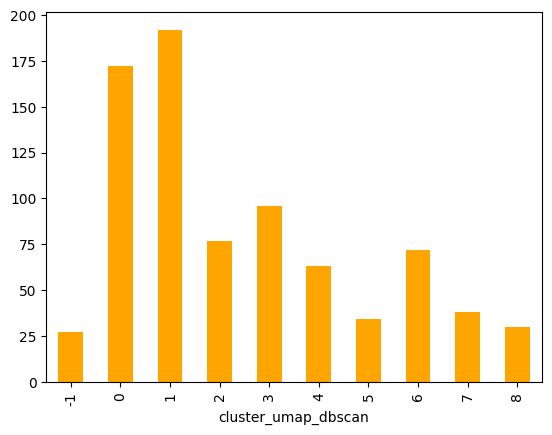

In [124]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [128]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

# -1 -> very high income, high spend on garden (more money -> big houses w/ gardens), high spend on seafood (expensive)
# 0 ->
# 1 -> high spend on spirits
# 2
# 3 -> only ones that spent money renting videos
# 4 -> spend a good part of their money on groceries
# 5 -> with high number of kids
# 6
# 7 -> wealthy but not as much as -1, big household size
# 8 -> spend more in Dairy deli, like to eat in restaurants

# -1, 7, 8 -> high incomes, high spends on cosmetics, flower, seafood

cluster_umap_dbscan,-1,0,1,2,3,4,5,6,7,8
marital_status_code,0.556,1.035,1.109,1.156,0.781,1.222,0.500,1.250,0.632,0.900
household_size_desc,2.333,2.198,2.052,1.961,2.375,2.127,2.412,2.000,3.132,2.233
kid_category_desc,0.556,0.558,0.464,0.416,0.594,0.571,0.706,0.431,1.211,0.500
household_key,1550.556,1178.308,1242.625,1226.130,1227.146,1210.587,1191.559,1176.028,1383.368,1333.933
adult_category_size,1.741,1.570,1.521,1.429,1.698,1.444,1.618,1.472,1.816,1.700
has_kids,0.333,0.227,0.198,0.143,0.292,0.190,0.353,0.194,0.421,0.267
avg_age,42.685,43.953,43.398,43.838,45.151,42.246,46.029,45.451,44.553,44.683
avg_income,219611.111,42000.000,62000.000,29500.000,87000.000,15142.857,112000.000,19500.000,137000.000,162000.000
male,0.815,0.733,0.609,0.597,0.771,0.603,0.735,0.597,0.842,0.833
female,0.926,0.785,0.682,0.805,0.812,0.746,0.794,0.819,0.842,0.867
